In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

**Get prediction data**

In [2]:
model_name = "dmnet"
width_ticks = 10
length_ticks = 2 * width_ticks
files = os.listdir("../logging")
rel_files = [f for f in files if model_name in f]
rel_files.sort()
#directory = "logging/20230810_165359_densnet_Ael8lbyb_md_h2.npz_densities_final"  # Fill this in
# Get latest run
directory = f"../logging/{rel_files[-1]}/preds.npz"
run_date = re.search(r'(.{16})' + model_name, rel_files[-1]).group(1)
run_date = run_date.replace("_", " ")
run_date = run_date[:-1]
run_date = run_date[:4] + "." + run_date[4:6] + "." + run_date[6:11] + ":" + run_date[11:13] + ":" + run_date[13:]

pred_data = np.load(directory, allow_pickle=True)

In [12]:
pred_dms = pred_data["pred_densities"].reshape((800, 6, 6, 14, 14))
pred_dms = pred_dms.transpose((0, 1, 3, 2, 4))
pred_dms = pred_dms.reshape((800, 6 * 14, 6 * 14))
pred_dms.shape

(800, 84, 84)

In [20]:
orig_data = np.load("../data/formamide.npz", allow_pickle=True)
diff_dms = orig_data["hf_1rdms"] - orig_data["mp_1rdms"]
diff_dms = diff_dms.reshape((1100, 6, 6, 14, 14))
diff_dms = diff_dms.transpose((0, 1, 3, 2, 4))
diff_dms = diff_dms.reshape((1100, 6 * 14, 6 * 14))
diff_dms = diff_dms[pred_data["data_idx"]]
diff_dms.shape

(800, 84, 84)

**Plot density matrices**

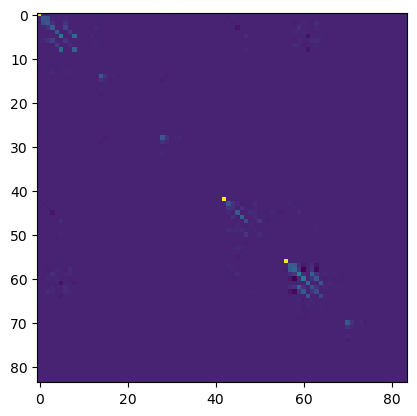

In [23]:
plt.imshow(pred_dms[0])